In [3]:
library(tidyverse)
# Load data
df = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_processed.csv')
# Changes wonSet variables to 1 and 0 to graph curve
df$wonSet <- as.logical(df$wonSet)
df$wonSet <- as.numeric(df$wonSet)
head(df)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170825 CU vs NSULA 3-1s1,CU,NSULA,17,1,True,5,18,4,0,1,0,1,15,2
2,170825 CU vs NSULA 3-1s2,CU,NSULA,17,0,True,8,19,2,0,4,2,1,13,5
3,170825 CU vs NSULA 3-1s3,CU,NSULA,17,1,True,7,16,3,0,4,0,1,13,2
4,170825 CU vs NSULA 3-1s4,CU,NSULA,17,1,True,3,19,0,1,2,0,1,12,6
5,170916 CU @ CO St 3-2s1,CU,CO St,17,0,True,8,17,6,0,2,0,0,16,1
6,170916 CU @ CO St 3-2s2,CU,CO St,17,0,True,6,22,3,0,3,0,1,19,2


In [ ]:
# Fit initial glm for sanity check
glm1 = glm(wonSet ~ unforcedErrs + earnedPts, df, family="binomial")
summary(glm1)


Call:
glm(formula = wonSet ~ unforcedErrs + earnedPts, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.85417    0.53197  -9.125  < 2e-16 ***
unforcedErrs -0.26372    0.04481  -5.886 3.96e-09 ***
earnedPts     0.38702    0.03219  12.025  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 687.19  on 684  degrees of freedom
AIC: 693.19

Number of Fisher Scoring iterations: 5


In [6]:
df[554,]
# 14 additional points scored above typical (32-30 sets, rows 482, 497)

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
554,181130 CU vs SC 2-3s1,CU,SC,18,0,False,7,26,3,0,4,0,2,22,2


In [11]:
df[482,]

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
482,180930 CU @ WA St 1-3s2,CU,WA St,18,0,False,7,29,5,0,2,0,3,22,4


In [12]:
df[497,]

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
497,181012 CU vs OR 1-3s2,CU,OR,18,0,False,6,27,4,0,2,0,2,24,1


In [ ]:
err_conf = -rev(confint(glm1, 'unforcedErrs'))
earned_conf = confint(glm1, 'earnedPts')
print(err_conf)
print(earned_conf)

Waiting for profiling to be done...

Waiting for profiling to be done...



   97.5 %     2.5 % 
0.1774556 0.3533389 
    2.5 %    97.5 % 
0.3261506 0.4524663 


In [ ]:
glm2 = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, df, family="binomial")
summary(glm2)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock, family = "binomial", data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.74599    0.53910  -8.803  < 2e-16 ***
serveErr    -0.17999    0.07197  -2.501   0.0124 *  
setErr      -0.07121    0.17796  -0.400   0.6891    
attackErr   -0.31957    0.05931  -5.388 7.12e-08 ***
freeballErr -0.26115    0.25697  -1.016   0.3095    
ace          0.58156    0.09181   6.334 2.39e-10 ***
kill         0.34014    0.03561   9.552  < 2e-16 ***
stuffBlock   0.48018    0.06544   7.338 2.16e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 672.50  on 679  degrees of freedom
AIC: 688.5

Number of Fisher Scoring iterations: 5


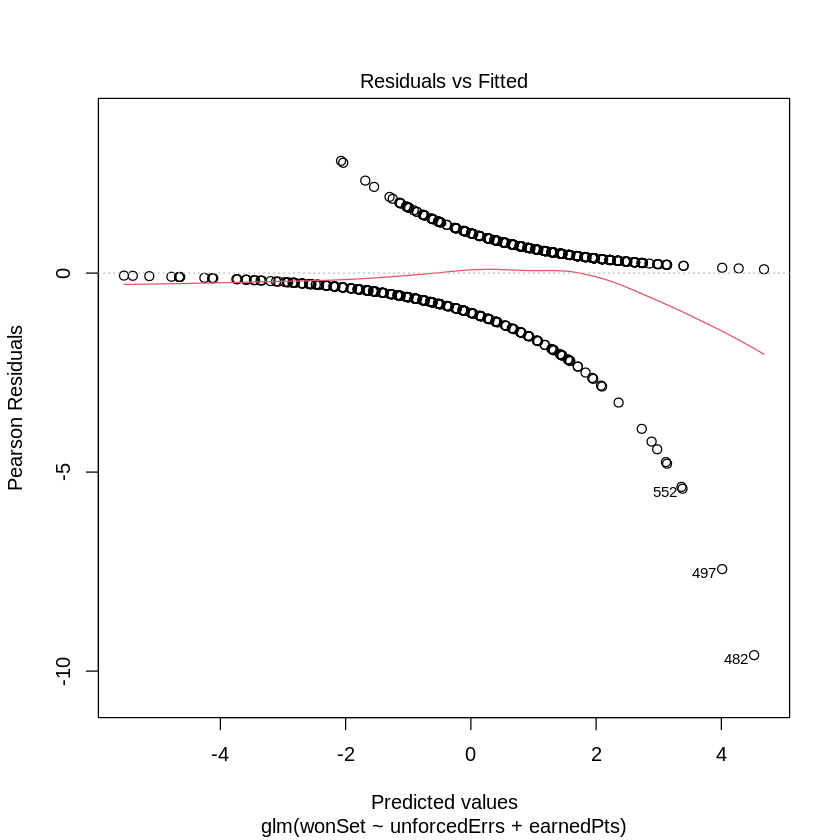

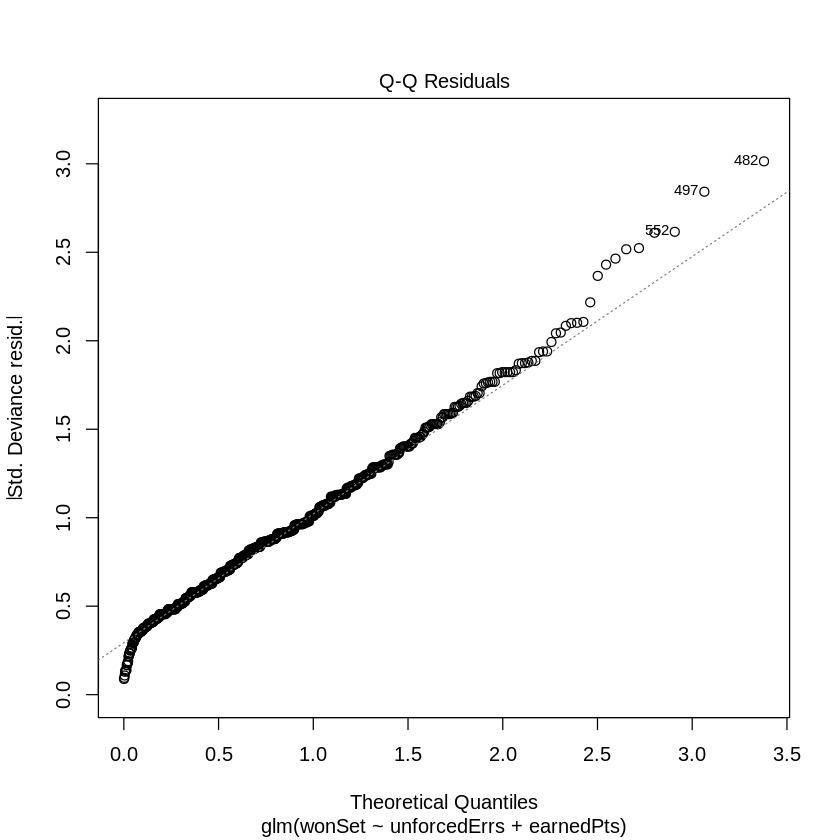

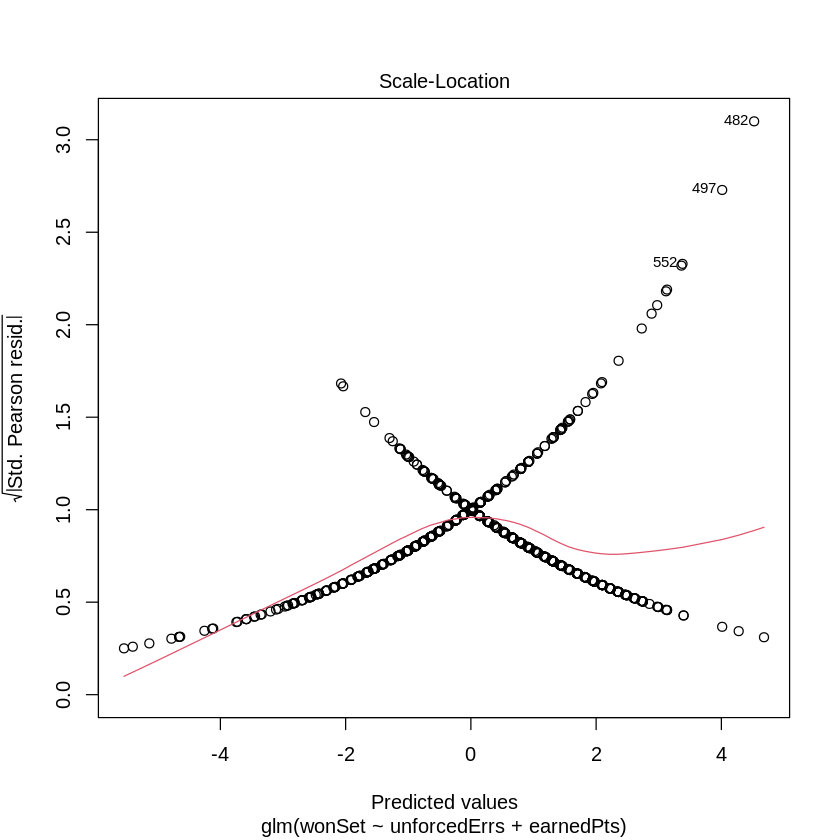

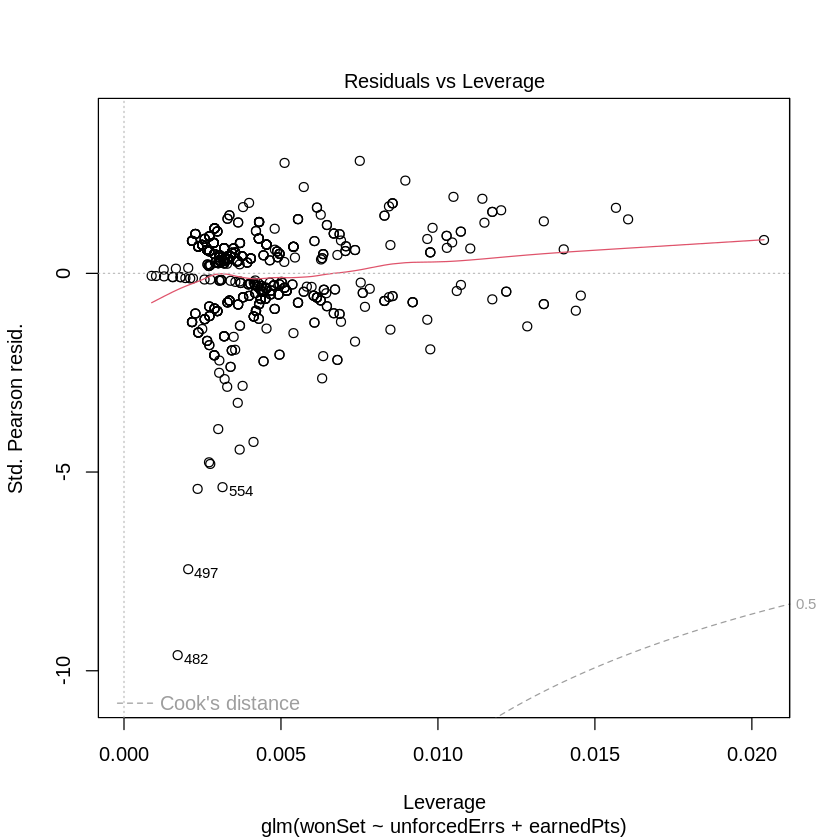

In [ ]:
plot(glm1)

In [ ]:
cor(df[,8:14])

,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill
earnedPts,1.00000000,0.10921189,-0.07720041,-0.04382837,0.05873375,0.37996080,0.86826446
serveErr,0.10921189,1.00000000,0.04514168,-0.06234777,-0.02930388,0.02349020,0.11121843
setErr,-0.07720041,0.04514168,1.00000000,0.01071206,0.03669935,0.03367661,-0.07147390
attackErr,-0.04382837,-0.06234777,0.01071206,1.00000000,0.04996972,-0.11032804,0.01131836
freeballErr,0.05873375,-0.02930388,0.03669935,0.04996972,1.00000000,0.05264786,0.08332046
ace,0.37996080,0.02349020,0.03367661,-0.11032804,0.05264786,1.00000000,0.09714938
kill,0.86826446,0.11121843,-0.07147390,0.01131836,0.08332046,0.09714938,1.00000000


In [ ]:
glm_sq_simple = glm(wonSet ~ unforcedErrs + I(unforcedErrs^2) + earnedPts + I(earnedPts^2), df, family="binomial")
summary(glm_sq_simple)


Call:
glm(formula = wonSet ~ unforcedErrs + I(unforcedErrs^2) + earnedPts + 
    I(earnedPts^2), family = "binomial", data = df)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -13.179833   2.030382  -6.491 8.51e-11 ***
unforcedErrs       -0.626854   0.172168  -3.641 0.000272 ***
I(unforcedErrs^2)   0.032148   0.015023   2.140 0.032365 *  
earnedPts           1.506047   0.235902   6.384 1.72e-10 ***
I(earnedPts^2)     -0.033012   0.006621  -4.986 6.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 660.81  on 682  degrees of freedom
AIC: 670.81

Number of Fisher Scoring iterations: 6


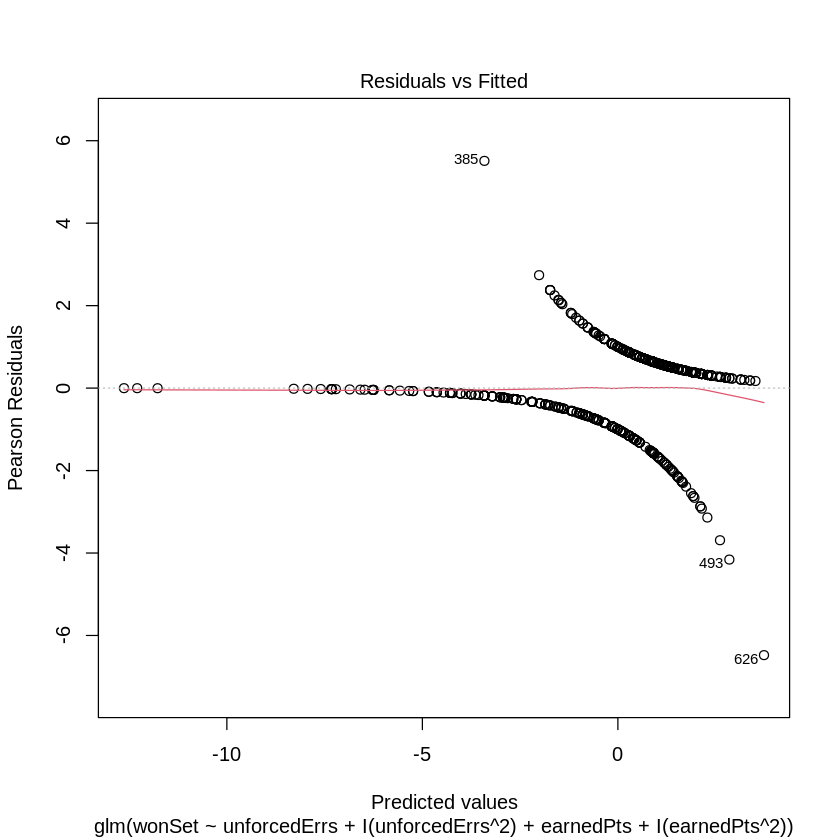

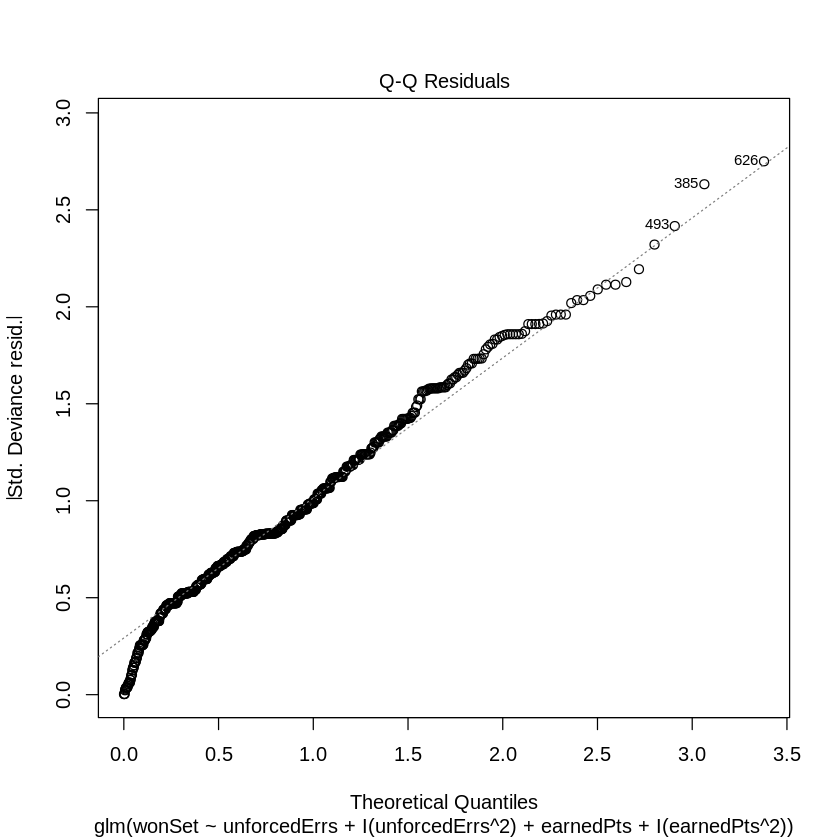

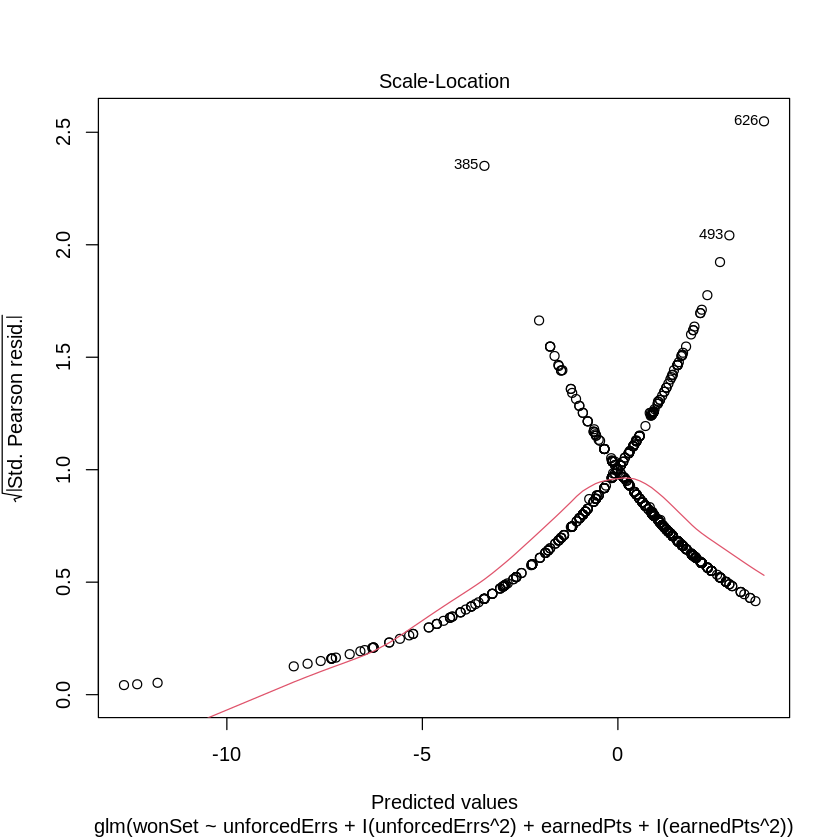

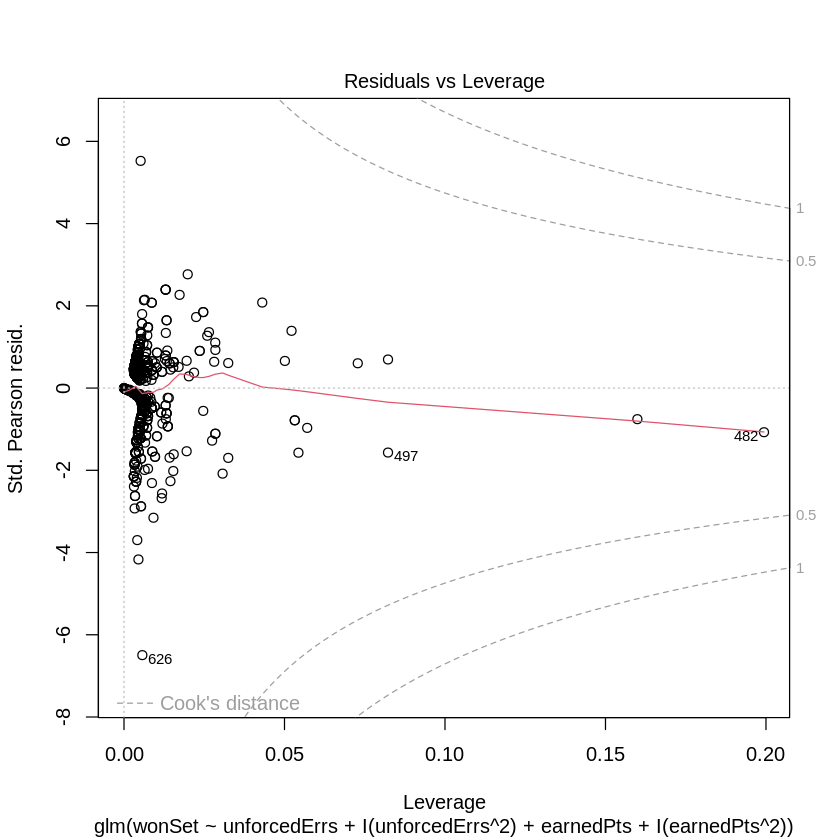

In [ ]:
plot(glm_sq_simple)

In [ ]:
glm3 = glm(wonSet ~ serveErr + setErr + attackErr + ace + kill + stuffBlock, df, family="binomial")
summary(glm3)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + ace + 
    kill + stuffBlock, family = "binomial", data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.72426    0.53742  -8.791  < 2e-16 ***
serveErr    -0.17804    0.07188  -2.477   0.0132 *  
setErr      -0.07611    0.17805  -0.427   0.6690    
attackErr   -0.32170    0.05914  -5.440 5.33e-08 ***
ace          0.57453    0.09120   6.300 2.98e-10 ***
kill         0.33628    0.03528   9.531  < 2e-16 ***
stuffBlock   0.48227    0.06537   7.378 1.61e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 673.51  on 680  degrees of freedom
AIC: 687.51

Number of Fisher Scoring iterations: 5


In [ ]:
glm4 = glm(wonSet ~ serveErr + attackErr + ace + kill + stuffBlock, df, family="binomial")
summary(glm4)


Call:
glm(formula = wonSet ~ serveErr + attackErr + ace + kill + stuffBlock, 
    family = "binomial", data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.75076    0.53404  -8.896  < 2e-16 ***
serveErr    -0.17974    0.07172  -2.506   0.0122 *  
attackErr   -0.32199    0.05911  -5.447 5.12e-08 ***
ace          0.57195    0.09088   6.293 3.11e-10 ***
kill         0.33702    0.03526   9.559  < 2e-16 ***
stuffBlock   0.48355    0.06526   7.409 1.27e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 673.70  on 681  degrees of freedom
AIC: 685.7

Number of Fisher Scoring iterations: 5


In [ ]:
glm_sq_full  = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock +
  I(serveErr^2) + I(setErr^2) + I(attackErr^2) + I(freeballErr^2) + I(ace^2) + I(kill^2) + I(stuffBlock^2), df, family="binomial")
summary(glm_sq_full)


Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock + I(serveErr^2) + I(setErr^2) + I(attackErr^2) + 
    I(freeballErr^2) + I(ace^2) + I(kill^2) + I(stuffBlock^2), 
    family = "binomial", data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -10.947867   1.545280  -7.085 1.39e-12 ***
serveErr          -0.049554   0.208802  -0.237  0.81240    
setErr            -0.399707   0.457385  -0.874  0.38217    
attackErr         -0.892036   0.192222  -4.641 3.47e-06 ***
freeballErr       -0.806100   0.755255  -1.067  0.28583    
ace                0.874824   0.221284   3.953 7.70e-05 ***
kill               1.419057   0.221014   6.421 1.36e-10 ***
stuffBlock         0.223820   0.207631   1.078  0.28105    
I(serveErr^2)     -0.028737   0.042456  -0.677  0.49849    
I(setErr^2)        0.199508   0.261051   0.764  0.44472    
I(attackErr^2)     0.082847   0.026767   3.095  0.00197 ** 
I(freeball

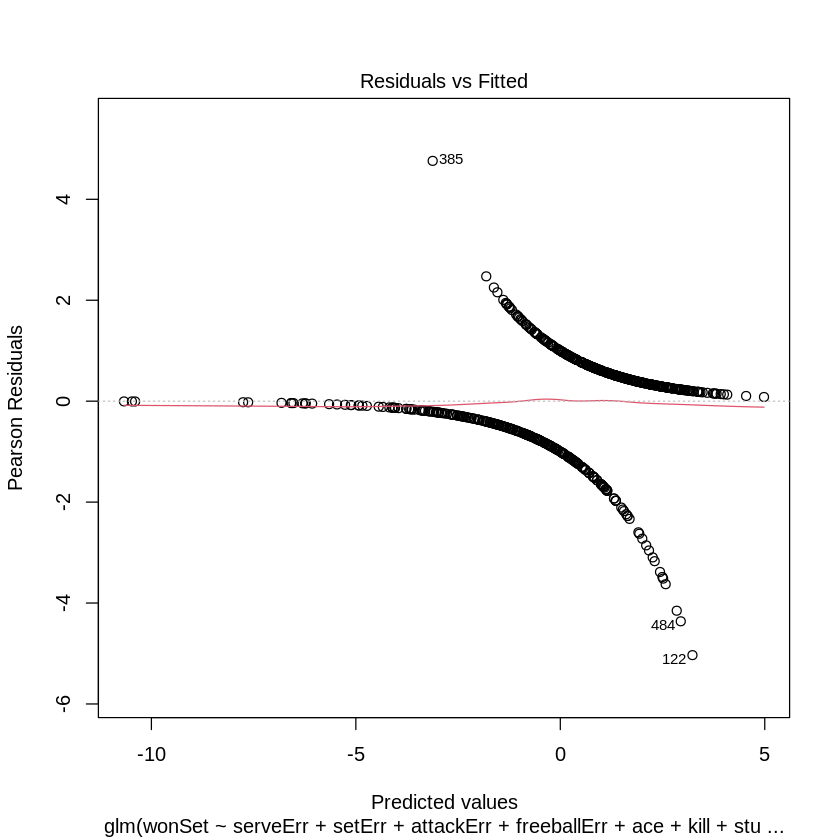

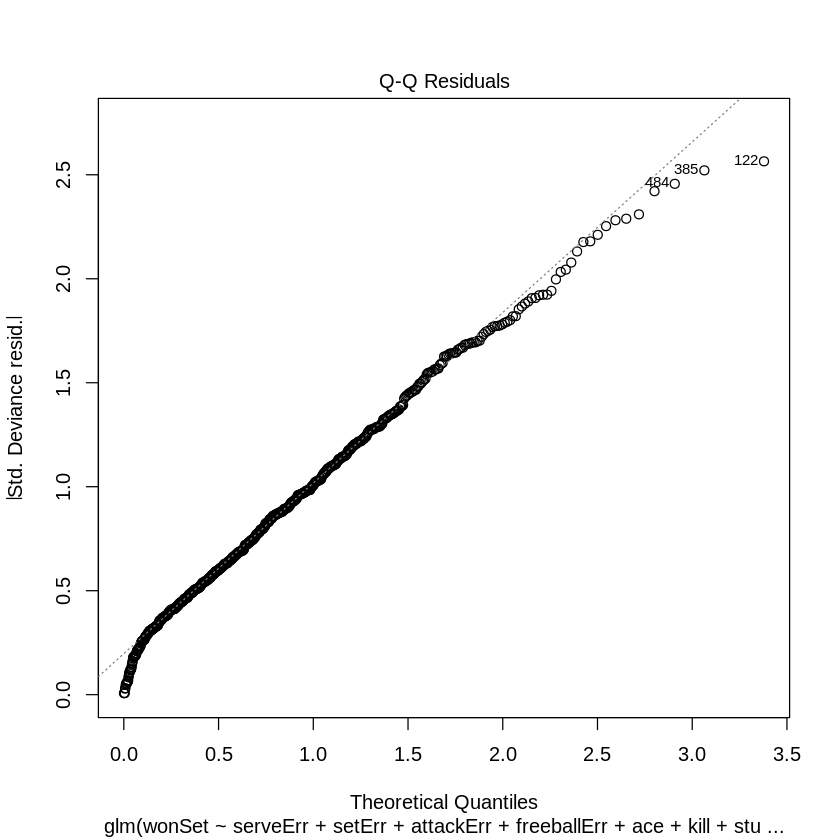

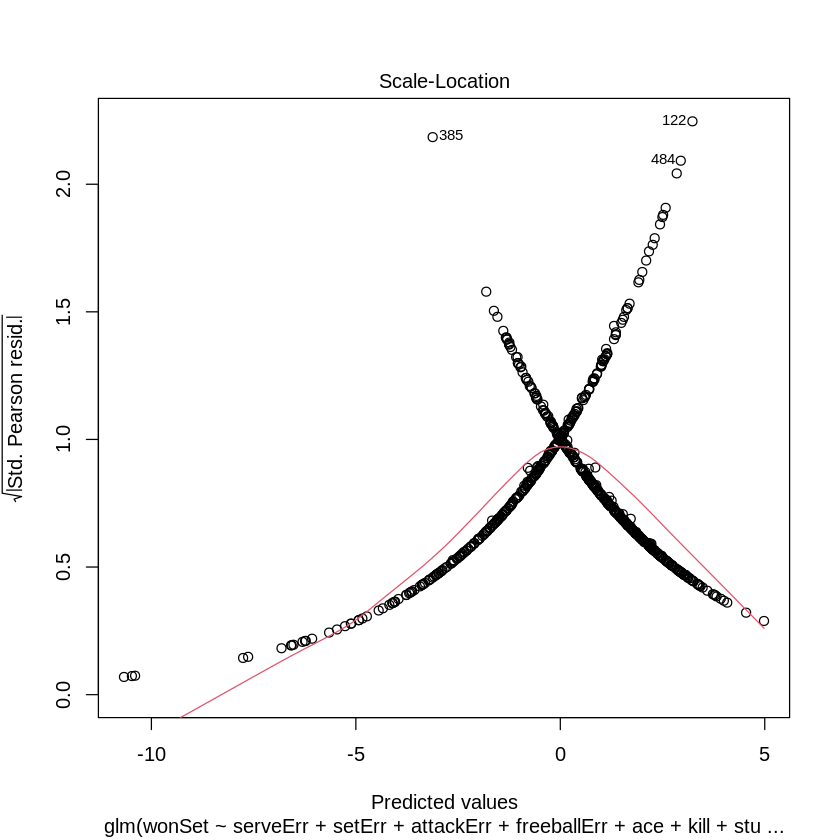

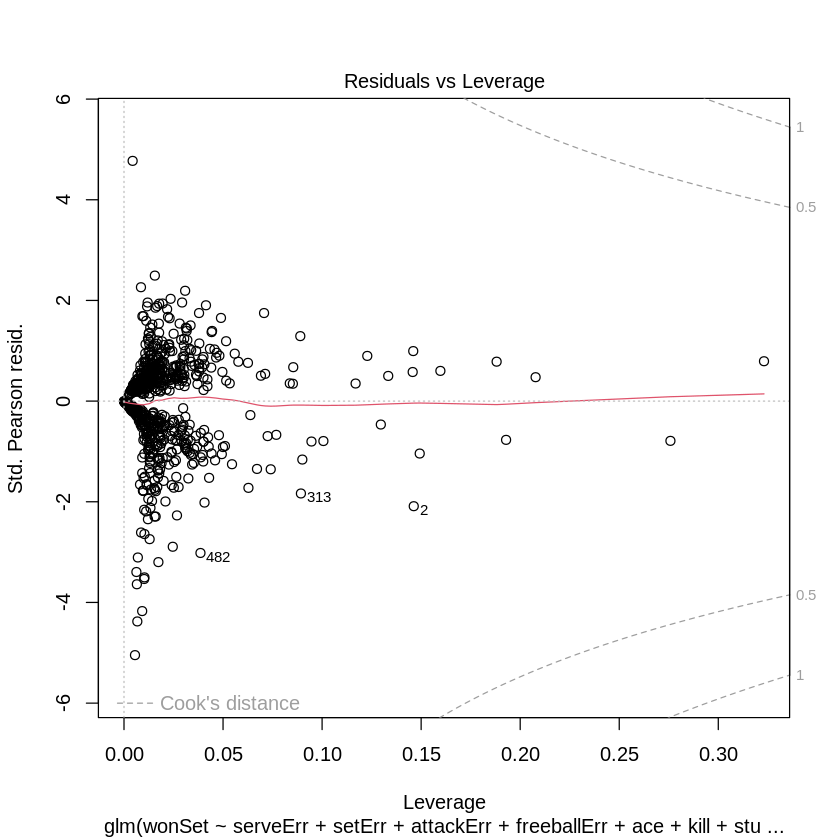

In [ ]:
plot(glm_sq_full)

`geom_smooth()` using formula = 'y ~ x'


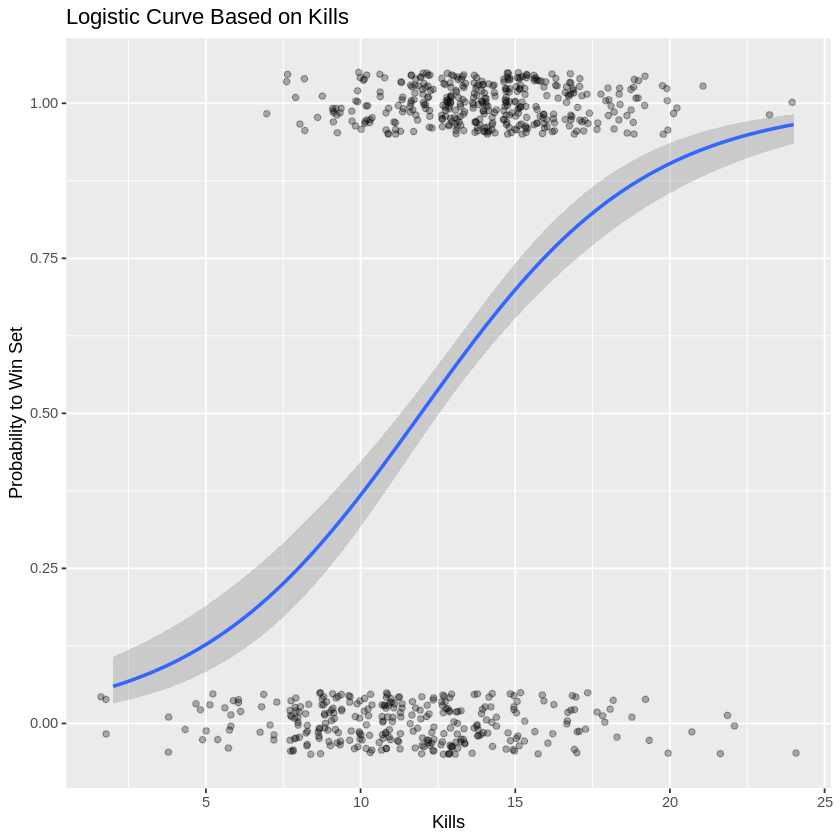

In [ ]:
library(tidyverse)
# Curve of winning set based on kills
ggplot(df, aes(x=kill, y=wonSet), xlab = "Kills")+
  labs(x = "Kills", y = "Probability to Win Set", title = "Logistic Curve Based on Kills") +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

`geom_smooth()` using formula = 'y ~ x'


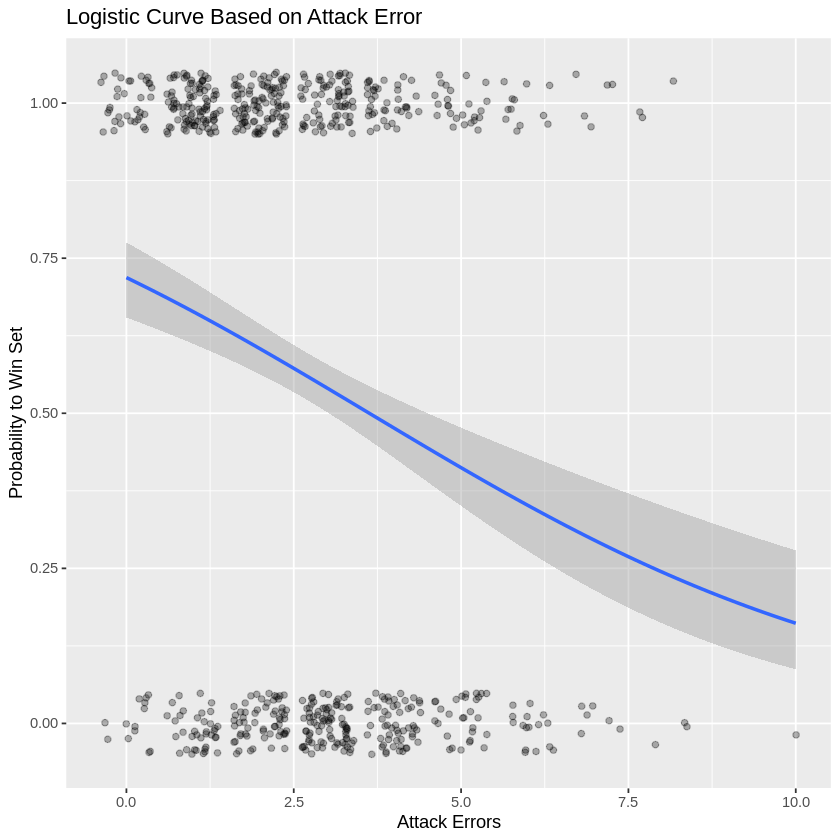

In [ ]:
# Curve of winning set based on attack error
ggplot(df, aes(x=attackErr, y=wonSet)) +
  labs(x = "Attack Errors", y = "Probability to Win Set", title = "Logistic Curve Based on Attack Error")+
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))
# while getting more kills does lead to a higher chance of winning, making attack errors seem to be more harmful

`geom_smooth()` using formula = 'y ~ x'


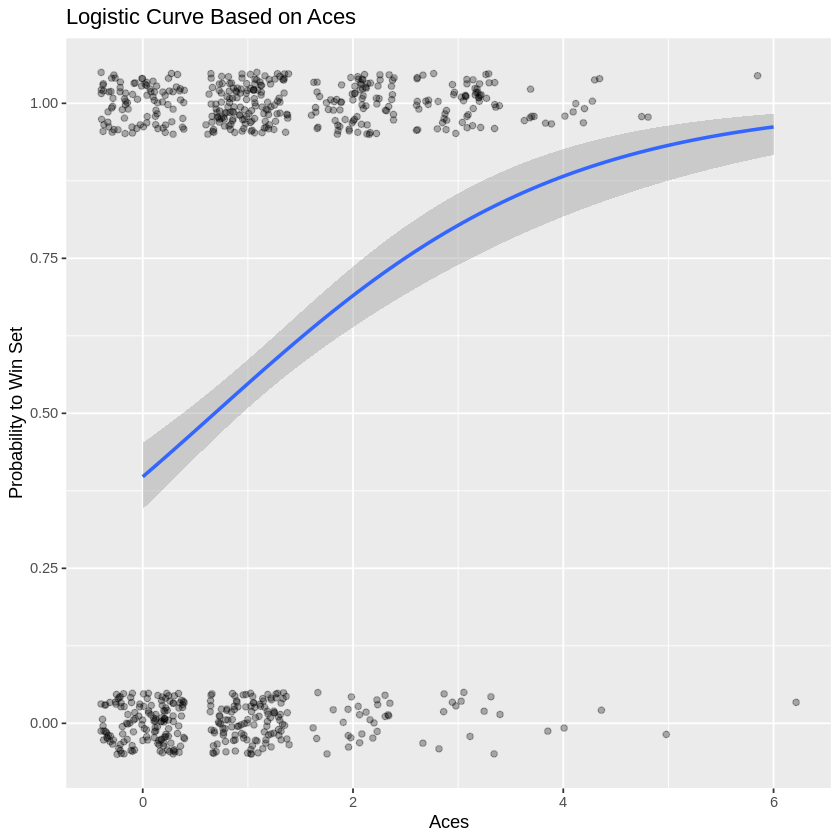

In [ ]:
# Curve of winning set based on aces
ggplot(df, aes(x=ace, y=wonSet))+
  labs(x = "Aces", y = "Probability to Win Set", title = "Logistic Curve Based on Aces") +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

# Showing the more aces you score increases your chance of winning the set while performing more service errors does not decrease the probability

`geom_smooth()` using formula = 'y ~ x'


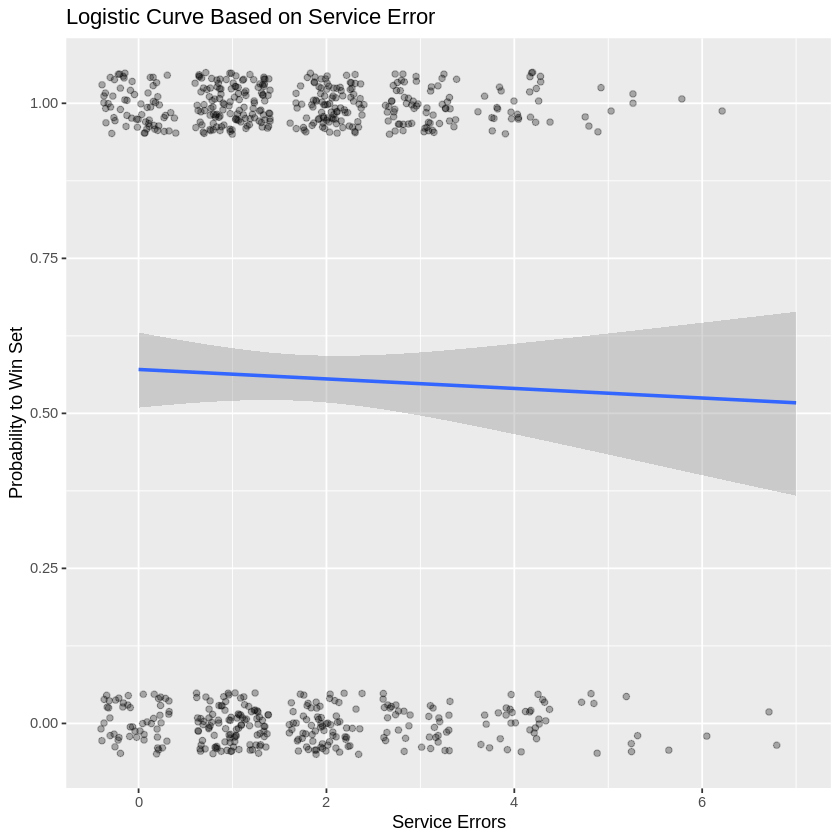

In [ ]:
# Curve of winning set based on service error
ggplot(df, aes(x=serveErr, y=wonSet))+
  labs(x = "Service Errors", y = "Probability to Win Set", title = "Logistic Curve Based on Service Error") +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))
# What does a service error consist of?

`geom_smooth()` using formula = 'y ~ x'


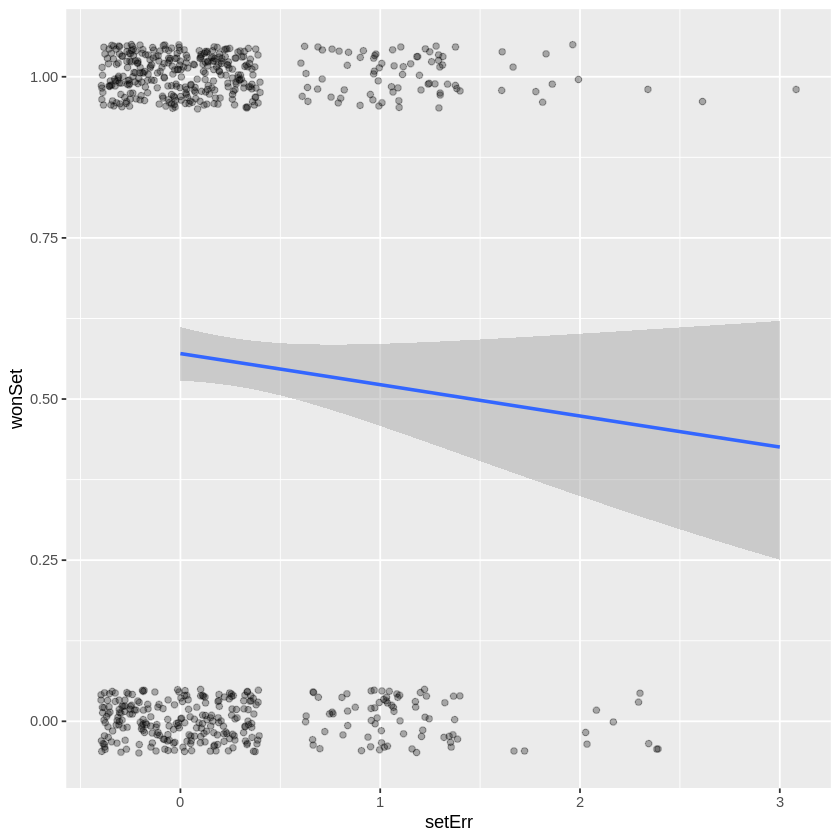

In [ ]:
# Curve of winning set based on set error
ggplot(df, aes(x=setErr, y=wonSet)) +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

`geom_smooth()` using formula = 'y ~ x'


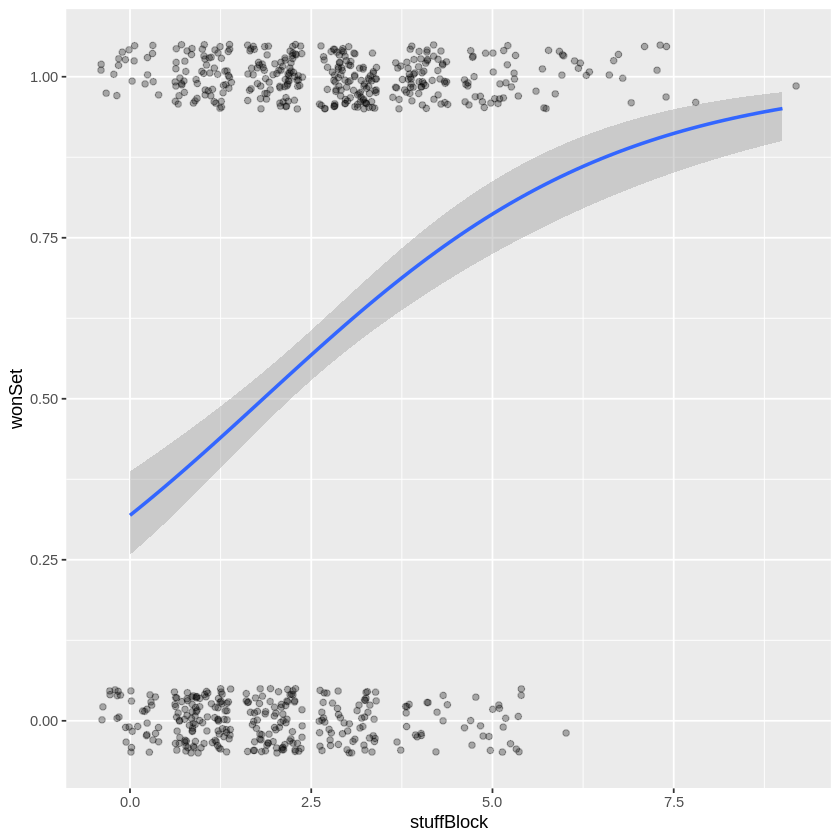

In [ ]:
# Curve of winning set based on stuff block
ggplot(df, aes(x=stuffBlock, y=wonSet)) +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

`geom_smooth()` using formula = 'y ~ x'


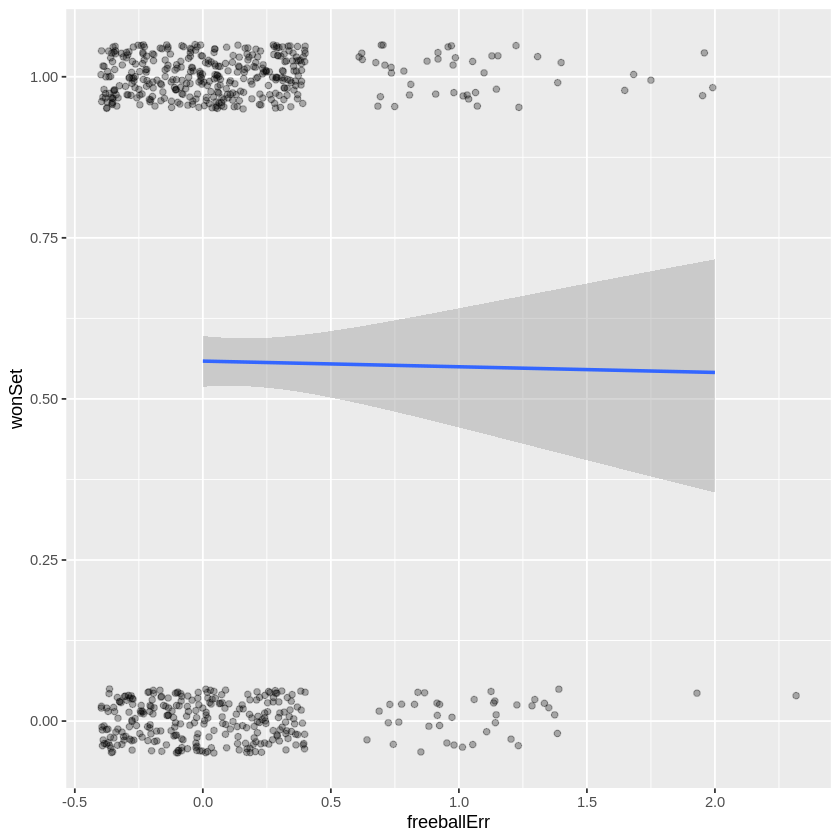

In [ ]:
# Curve of winning set based on free ball error
ggplot(df, aes(x=freeballErr, y=wonSet)) +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

`geom_smooth()` using formula = 'y ~ x'


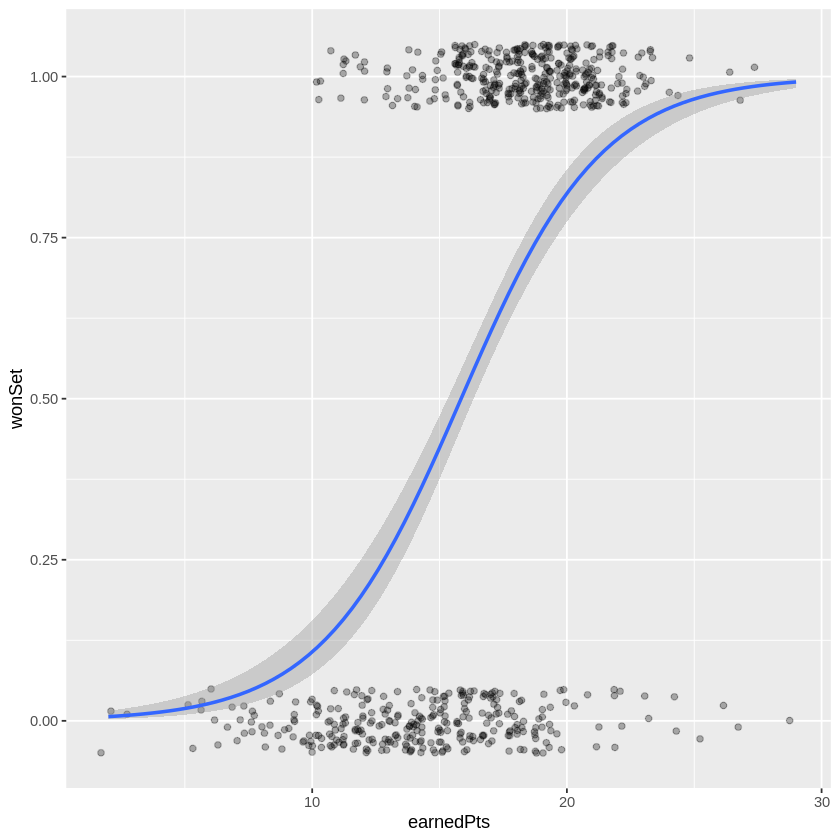

In [ ]:
# Curve of winning set based on earned points
ggplot(df, aes(x=earnedPts, y=wonSet)) +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

`geom_smooth()` using formula = 'y ~ x'


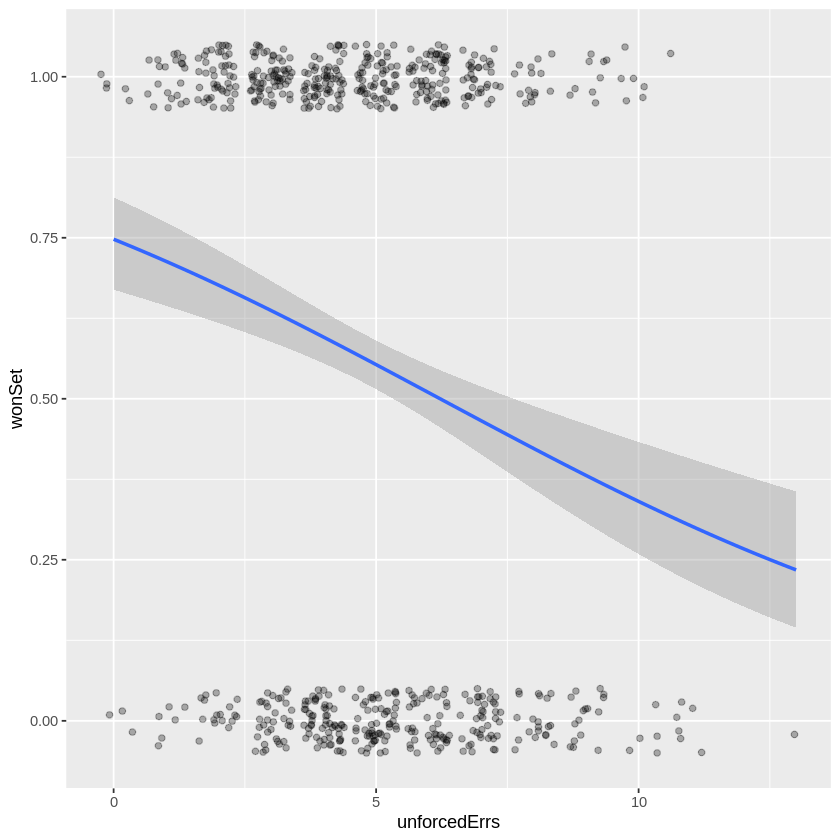

In [ ]:
# Curve of winning set based on unforced errors
ggplot(df, aes(x=unforcedErrs, y=wonSet)) +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

In [ ]:
# CU Dataset Setup
library(dplyr)
CU = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_CU.csv')
CU$wonSet = as.factor(CU$wonSet)
head(CU)
CU_X = CU %>% select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonSet, -wonMatch, -season, -teamName)
CU_Y = CU %>% select(wonSet)
CU_train = data.frame(CU_X, CU_Y)

# Opposing teams:
opp = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_opp.csv')
head(opp)
opp$wonSet = as.factor(opp$wonSet)
opp_X = opp %>% select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonSet, -wonMatch, -season, -teamName)
opp_Y = opp %>% select(wonSet)
opp_train = data.frame(opp_X, opp_Y)

,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170825 CU vs NSULA 3-1s1,CU,NSULA,17,True,True,5,18,4,0,1,0,1,15,2
2,170825 CU vs NSULA 3-1s2,CU,NSULA,17,False,True,8,19,2,0,4,2,1,13,5
3,170825 CU vs NSULA 3-1s3,CU,NSULA,17,True,True,7,16,3,0,4,0,1,13,2
4,170825 CU vs NSULA 3-1s4,CU,NSULA,17,True,True,3,19,0,1,2,0,1,12,6
5,170916 CU @ CO St 3-2s1,CU,CO St,17,False,True,8,17,6,0,2,0,0,16,1
6,170916 CU @ CO St 3-2s2,CU,CO St,17,False,True,6,22,3,0,3,0,1,19,2


,setname,teamName,opponent,season,wonSet,wonMatch,unforcedErrs,earnedPts,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,170825 CU vs NSULA 3-1s1,NSULA,CU,17,False,False,7,9,0,0,6,1,1,8,0
2,170825 CU vs NSULA 3-1s2,NSULA,CU,17,True,False,7,20,1,2,4,0,0,16,4
3,170825 CU vs NSULA 3-1s3,NSULA,CU,17,False,False,9,10,4,0,5,0,2,8,0
4,170825 CU vs NSULA 3-1s4,NSULA,CU,17,False,False,6,12,3,0,3,0,1,11,0
5,170916 CU @ CO St 3-2s1,CO St,CU,17,True,False,4,17,0,0,4,0,3,12,2
6,170916 CU @ CO St 3-2s2,CO St,CU,17,True,False,1,19,1,0,0,0,3,13,3


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


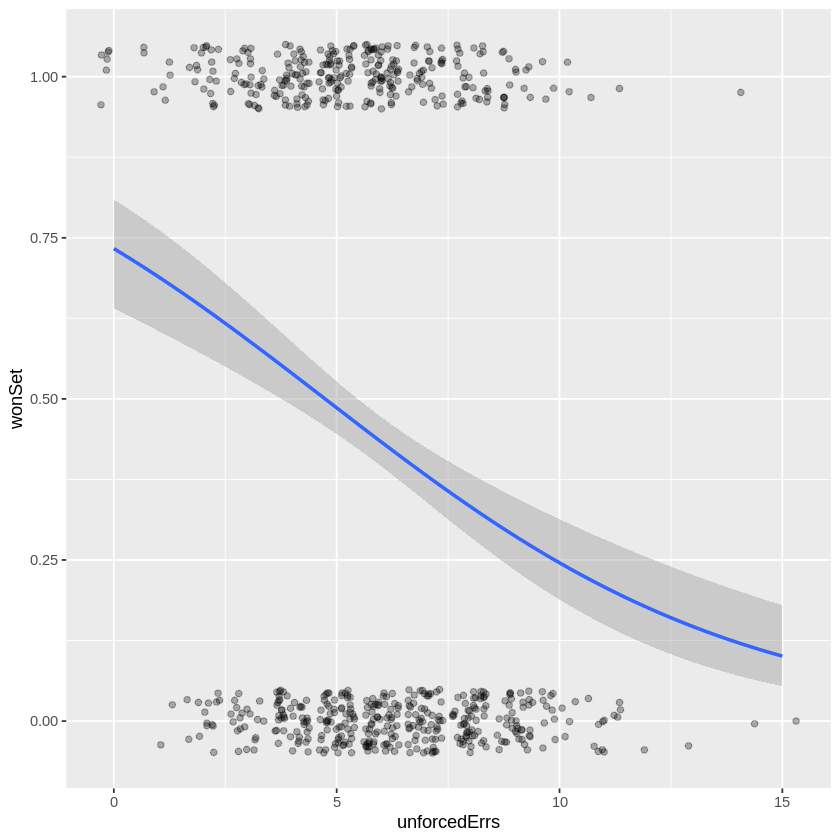

`geom_smooth()` using formula = 'y ~ x'


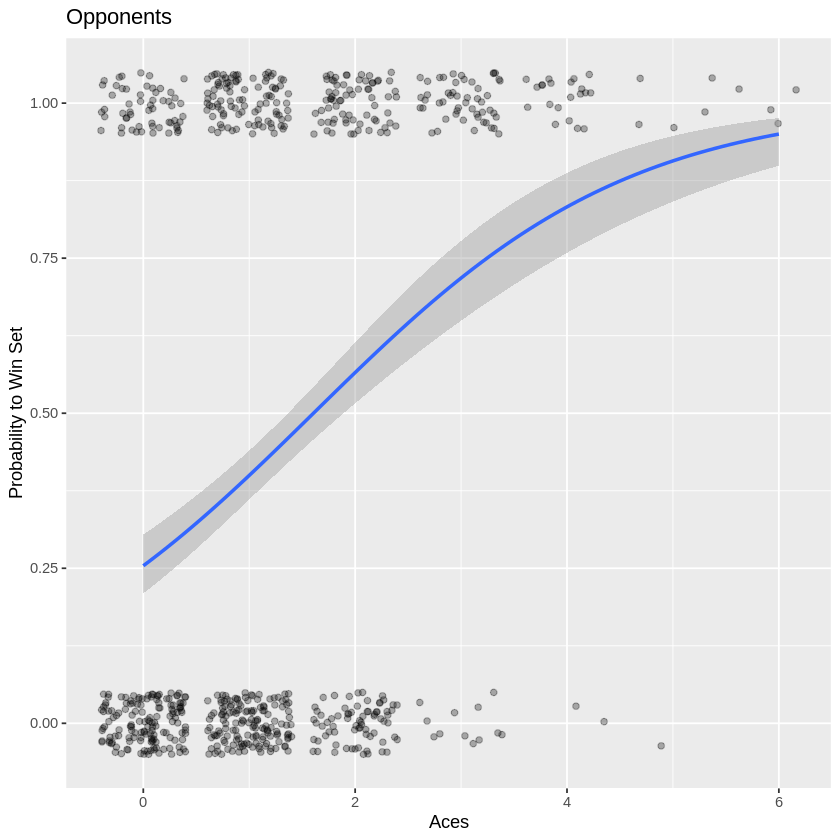

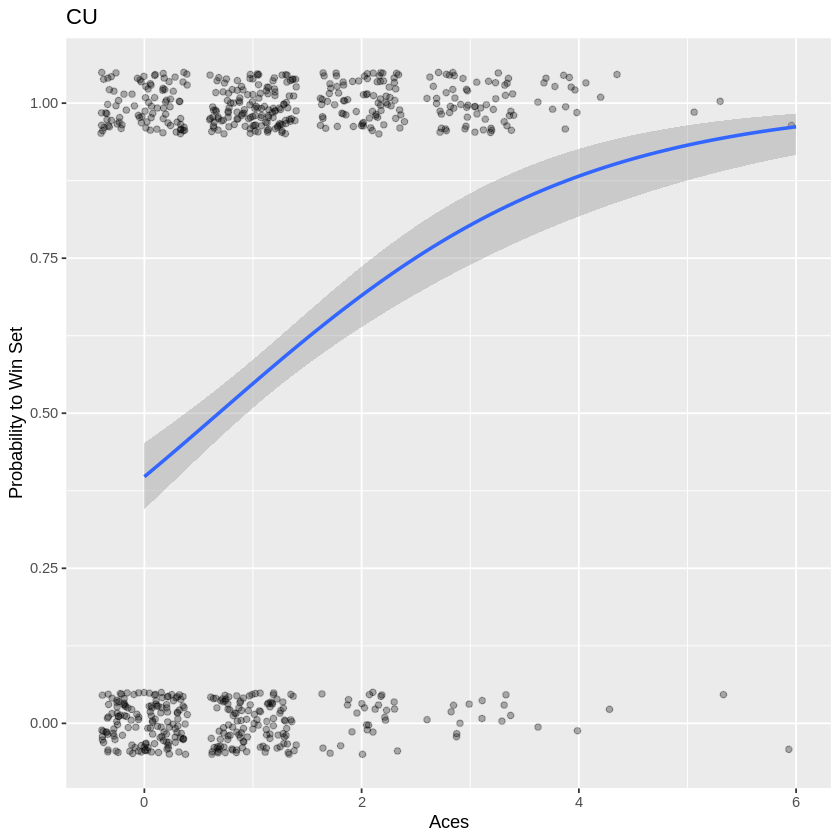

In [ ]:
opp$wonSet <- as.logical(opp$wonSet)
opp$wonSet <- as.numeric(opp$wonSet)

CU$wonSet <- as.logical(CU$wonSet)
CU$wonSet <- as.numeric(CU$wonSet)
ggplot(opp, aes(x=unforcedErrs, y=wonSet)) +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

ggplot(opp, aes(x=ace, y=wonSet)) +
  labs(x = "Aces", y = "Probability to Win Set", title = "Opponents") +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

ggplot(CU, aes(x=ace, y=wonSet))+
  labs(x = "Aces", y = "Probability to Win Set", title = "CU") +
  geom_jitter(height = 0.05, alpha = 0.3) +
  stat_smooth(method="glm", se=TRUE, method.args = list(family=binomial))

